Implementation of the Euler method to solve Jarrah's system (there's no diffusion term as there are no neighbouring cells, it is an ODEs system, there's no dependence on space).

In [4]:
def euler(t_i, t_max, dt, initial_conditions, parameters, diff_coeff, damage_par):

    H_i, C_i, M_i, N_i, D_i, R_i = initial_conditions
    k1, k2, k3, k4, k5, k6, d_H, d_C, d_M, d_D = parameters
    sigma, m, h = damage_par
    D_H, D_C, D_M = diff_coeff

    num_steps = int((t_max - t_i) / dt)

    H = [0.] * num_steps
    C = [0.] * num_steps
    M = [0.] * num_steps
    N = [0.] * num_steps
    D = [0.] * num_steps
    R = [0.] * num_steps

    H[0] = H_i
    C[0] = C_i
    M[0] = M_i
    N[0] = N_i
    D[0] = D_i
    R[0] = R_i
    
    t = [0.] * num_steps

    for i in range(num_steps - 1):

        H[i+1] = H[i] + dt * (k1 * D[i] * M[i] + d_H * (H[0] - H[i]))
        C[i+1] = C[i] + dt * (k2 * D[i] * H[i] + d_C * (C[0] - C[i]))        
        M[i+1] = M[i] + dt * (k3 * D[i] * M[i] + d_M * (M[0] - M[i]))
        N[i+1] = N[i] + dt * (k4 * R[i] - N[i] * (k5 * C[i] + damage(t, i, sigma, m, h)))
        D[i+1] = D[i] + dt * (N[i] * (k5 * C[i] + damage(t, i, sigma, m, h)) - D[i] * (k6 * M[i] + d_D))
        R[i+1] = R[i] + dt * (D[i] * (k6 * M[i] + d_D) - k4 * R[i])

        t[i+1] = dt * i

    return H, C, M, N, D, R, t
    
#damage function
def damage(t, i, sigma, m, h):

    if t[i]==0 or t[i] <=1e-7:       ######## Elena, ricontrollati i limiti dei float
        return 0.
    else:
        return h / (t[i] * sigma * np.sqrt(2*np.pi)) * np.exp(-(np.log(t[i]) - m)**2 / (2. * sigma**2))

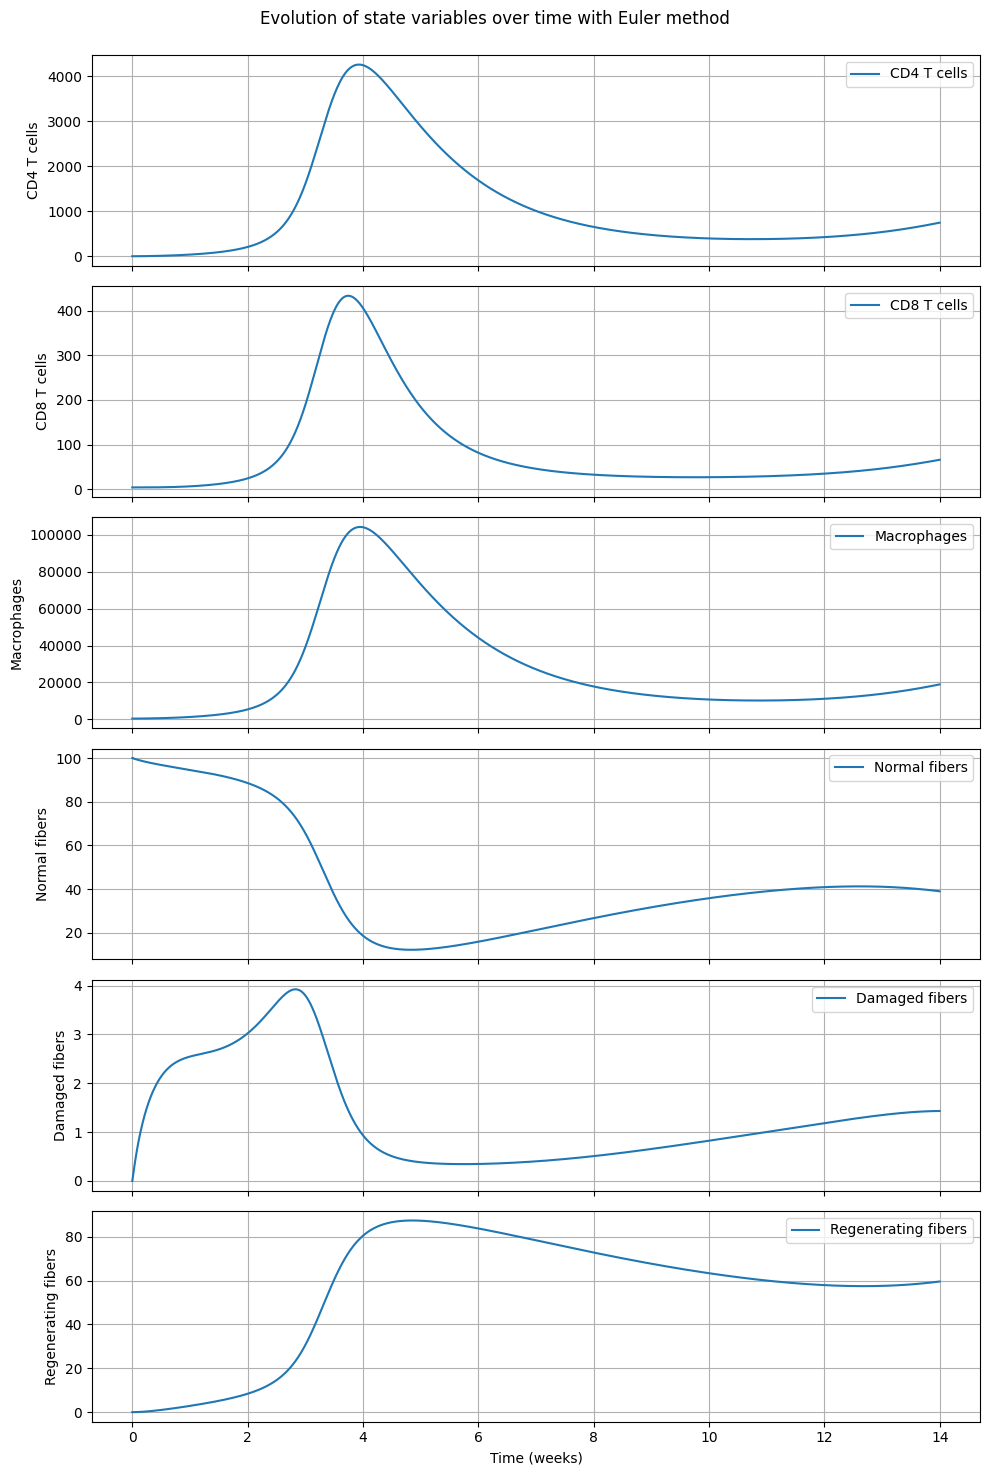

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Initial conditions and parameters from Jarrah's paper
initial_conditions = [0., 4., 400., 100., 0., 0.]
H_i, C_i, M_i, N_i, D_i, R_i = initial_conditions
parameters = [0.0324139, 0.115375, 0.766576, 0.123848, 4.09948e-3, 3.23097e-4, 0.83355, 1.61511, 0.781155, 1.34671]
k1, k2, k3, k4, k5, k6, d_H, d_C, d_M, d_D = parameters
damage_par = [2.92815, 4.22686, 0.511657]
sigma, m, h = damage_par

#diffusion coefficients (NB: look up if you find something similar in other articles
diff_coeff = 1e-1, 1e-1, 1e-1
D_H, D_C, D_M = diff_coeff

dt = 0.002 ###########CHECK THIS LATER
t_i = 0
t_max = 14

H, C, M, N, D, R, t = euler(t_i, t_max, dt, initial_conditions, parameters, diff_coeff, damage_par)



n_vars = len(initial_conditions)
labels = ["CD4 T cells", "CD8 T cells", "Macrophages", "Normal fibers", "Damaged fibers", "Regenerating fibers"]
state_var = [H, C, M, N, D, R]

#create subplots
fig, axes = plt.subplots(n_vars, 1, figsize=(10, 15), sharex=True)

for i in range(n_vars):
    axes[i].plot(t,state_var[i],label=labels[i])
    axes[i].set_ylabel(labels[i])
    axes[i].legend()
    axes[i].grid(True)

#the last subplot is the only one with the label on the x axes
axes[-1].set_xlabel('Time (weeks)')

#title
fig.suptitle('Evolution of state variables over time with Euler method')

#adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)

plt.show()